# EF REMOVED VAL=0,2,3

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pyodbc 
import nltk
import re

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=HHVDBCORT01;'
                      'Database=NASIR;'
                      'user =HHVDBCORT01\\TMHBXB78;'
                      'Trusted_Connection=yes;')

sql_query = pd.read_sql_query('SElect * from NASIR.DBO.POINT_ESTIMATES_NLP_PROSPECTIVE WHERE EF_OUTCOMES<>8', conn)
df = pd.DataFrame(sql_query, columns=['Findings_Value','EF_OUTCOMES'])
print(df)

                         Findings_Value EF_OUTCOMES
0             LV ejection fraction= 52%           5
1                 Estimated EF is >70%.           6
2                 Estimated EF is >70%.           6
3     Biplane LV ejection fraction= 35%           3
4                 Estimated EF is >70%.           6
...                                 ...         ...
7438              Estimated EF is >70%.           6
7439              Estimated EF is >70%.           6
7440  Biplane LV ejection fraction= 27%           2
7441              Estimated EF is >70%.           6
7442      LV EF by single plane is 57%.           5

[7443 rows x 2 columns]


# DATA PRE PROCESSING

In [34]:
##removal of extra spaces from the text
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+',' ', str(x)))
##removal of non-words characters with space
##df['FINDINGS_VALUE'] =  df['FINDINGS_VALUE'].apply(lambda x: re.sub(r'\W',' ', str(x)))
##ANY ONE digit/non-digit character
##df['FINDINGS_VALUE'] =  df['FINDINGS_VALUE'].apply(lambda x: re.sub(r'\d',' ', str(x)))
##removal of single characters within sentence
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+[a-z]\s+',' ', str(x)))
##removal of single characters beginning of sentence or at the end
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'^[a-z]\s+',' ', str(x)))

In [35]:
print(df)

                         Findings_Value EF_OUTCOMES
0             LV ejection fraction= 52%           5
1                 Estimated EF is >70%.           6
2                 Estimated EF is >70%.           6
3     Biplane LV ejection fraction= 35%           3
4                 Estimated EF is >70%.           6
...                                 ...         ...
7438              Estimated EF is >70%.           6
7439              Estimated EF is >70%.           6
7440  Biplane LV ejection fraction= 27%           2
7441              Estimated EF is >70%.           6
7442      LV EF by single plane is 57%.           5

[7443 rows x 2 columns]


# REMOVAL OF STOPWORDS

In [36]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
stop_words = set(stopwords.words('english'))  

def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)  
    clean_tokens = [w for w in word_tokens if not w in stop_words]  
    
    return clean_tokens
    
df['Findings_Value'] = df['Findings_Value'].apply(remove_stopwords)

In [37]:
print(df)

                                 Findings_Value EF_OUTCOMES
0              [LV, ejection, fraction=, 52, %]           5
1                  [Estimated, EF, >, 70, %, .]           6
2                  [Estimated, EF, >, 70, %, .]           6
3     [Biplane, LV, ejection, fraction=, 35, %]           3
4                  [Estimated, EF, >, 70, %, .]           6
...                                         ...         ...
7438               [Estimated, EF, >, 70, %, .]           6
7439               [Estimated, EF, >, 70, %, .]           6
7440  [Biplane, LV, ejection, fraction=, 27, %]           2
7441               [Estimated, EF, >, 70, %, .]           6
7442          [LV, EF, single, plane, 57, %, .]           5

[7443 rows x 2 columns]


# REMOVAL OF SPEACIAL CHARACTERS

In [38]:
# removal of numbers from text
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\[[0-9]*\]',' ', str(x)))
##removal of extra spaces from the text
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+',' ', str(x)))
##removal of non words characters with space
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\W',' ', str(x)))
##
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+',' ', str(x)))

In [39]:
df.head()

,Findings_Value,EF_OUTCOMES
0,LV ejection fraction 52,5
1,Estimated EF 70,6
2,Estimated EF 70,6
3,Biplane LV ejection fraction 35,3
4,Estimated EF 70,6


In [40]:
print(df)

                         Findings_Value EF_OUTCOMES
0              LV ejection fraction 52            5
1                      Estimated EF 70            6
2                      Estimated EF 70            6
3      Biplane LV ejection fraction 35            3
4                      Estimated EF 70            6
...                                 ...         ...
7438                   Estimated EF 70            6
7439                   Estimated EF 70            6
7440   Biplane LV ejection fraction 27            2
7441                   Estimated EF 70            6
7442             LV EF single plane 57            5

[7443 rows x 2 columns]


In [41]:
df.isnull().sum()

Findings_Value    0
EF_OUTCOMES       0
dtype: int64

In [452]:
df.to_excel (r'I:\BUDHA\C3PH ECHO\Python pipeline\export_dataframe_EF_outcomes.xlsx', index = False, header=True)

In [42]:
df['EF_OUTCOMES'].value_counts()

6    5403
5     613
4     439
1     390
3     313
2     181
7      56
0      48
Name: EF_OUTCOMES, dtype: int64

# DIVIDE THE DATA INTO TRAINING AND TEST SET

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=df['Findings_Value']

In [45]:
y=df['EF_OUTCOMES']

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# TERM FREQUENCY INVERSE DOCUMENT FREQUENCY (TFIDF) TRANSFORMATION

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
#creating bag of words
count_vect = CountVectorizer(min_df=1,max_df=1.0)

In [49]:
X_counts = count_vect.fit_transform(X)

In [50]:
X_counts.shape

(7443, 164)

In [51]:
print(X_counts)

  (0, 115)	1
  (0, 101)	1
  (0, 105)	1
  (0, 44)	1
  (1, 102)	1
  (1, 100)	1
  (1, 62)	1
  (2, 102)	1
  (2, 100)	1
  (2, 62)	1
  (3, 115)	1
  (3, 101)	1
  (3, 105)	1
  (3, 85)	1
  (3, 25)	1
  (4, 102)	1
  (4, 100)	1
  (4, 62)	1
  (5, 102)	1
  (5, 100)	1
  (5, 62)	1
  (6, 102)	1
  (6, 100)	1
  (6, 62)	1
  (7, 115)	1
  :	:
  (7436, 105)	1
  (7436, 85)	1
  (7436, 43)	1
  (7437, 102)	1
  (7437, 100)	1
  (7437, 62)	1
  (7438, 102)	1
  (7438, 100)	1
  (7438, 62)	1
  (7439, 102)	1
  (7439, 100)	1
  (7439, 62)	1
  (7440, 115)	1
  (7440, 101)	1
  (7440, 105)	1
  (7440, 85)	1
  (7440, 16)	1
  (7441, 102)	1
  (7441, 100)	1
  (7441, 62)	1
  (7442, 115)	1
  (7442, 100)	1
  (7442, 49)	1
  (7442, 144)	1
  (7442, 128)	1


In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_transformer = TfidfTransformer()

In [54]:
X_tfidf=tfidf_transformer.fit_transform(X_counts)

In [55]:
X_tfidf

<7443x164 sparse matrix of type '<class 'numpy.float64'>'
	with 26292 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.preprocessing import LabelEncoder
y_new= LabelEncoder().fit_transform(y)

In [57]:
y_new.shape

(7443,)

In [58]:
X_tfidf.shape

(7443, 164)

In [59]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

Class=5, n=5403 (12.500%)
Class=6, n=5403 (12.500%)
Class=3, n=5403 (12.500%)
Class=4, n=5403 (12.500%)
Class=1, n=5403 (12.500%)
Class=2, n=5403 (12.500%)
Class=7, n=5403 (12.500%)
Class=0, n=5403 (12.500%)


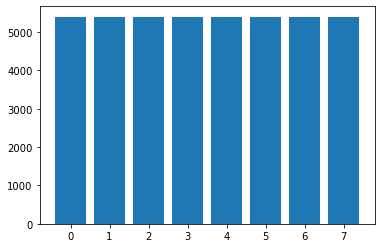

In [60]:
oversample = SMOTE()
X_tfidf, y_new = oversample.fit_resample(X_tfidf, y_new)
counterx = Counter(y_new)
for k,v in counterx.items():
    per = v / len(y_new) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counterx.keys(), counterx.values())
pyplot.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_new,test_size=0.33,random_state=42)

# FINAL :1ST method(7:3): BOW+TFIDF+RANDOM FOREST+HYPERPARAMETER OPTIMIZATION USING RANDOMIZED SEARCH CROSS VALIDATION

In [62]:
from sklearn.ensemble import RandomForestClassifier
#divide the data 7:3
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_new,test_size=0.33,random_state=42)




In [63]:
#number of trees that will be used as hyperparamter with a list starting from 10 to 220 at a interval of 50
n_estimators_list=list(range(10,220,50))
#best fit calculation for decision tree with two possible values 
criterion_list=['gini','entropy']
max_depth_list=list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list=[x/1000 for x in list (range (5,41,10))]
min_samples_leaf_list=[x/1000 for x in list (range (5,41,10))]
max_features_list=['sqrt','log2']

params_grid= {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list        
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *=len(params_grid[k])
    
print('Number of combinations =', num_combinations)
params_grid

Number of combinations = 1600


{'n_estimators': [10, 60, 110, 160, 210],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'max_features': ['sqrt', 'log2']}

In [66]:
from sklearn.model_selection import RandomizedSearchCV
def my_roc_auc_score(model, X_train, y_train): return metrics.roc_auc_score(y_test, model.predict(X_test))

model_rf= RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=params_grid,
                             n_iter=50,
                             cv=10,
                             return_train_score=True)
model_rf.fit(X_train,y_train)
                            

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.015,
                                                             0.025, 0.035],
                                        'min_samples_split': [0.005, 0.015,
                                                              0.025, 0.035],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True)

In [67]:
model_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 0.005,
 'min_samples_leaf': 0.005,
 'max_features': 'log2',
 'max_depth': 35,
 'criterion': 'gini'}

In [68]:
#creating final model for random forest
model_rf_fin=RandomForestClassifier(
                                   criterion='gini',
                                   max_features='log2',
                                   min_samples_leaf=0.005,
                                   min_samples_split=0.005,
                                   n_estimators=210,
                                   max_depth=35,
                                   random_state=42)
model_rf_fin.fit(X_train,y_train)

RandomForestClassifier(max_depth=35, max_features='log2',
                       min_samples_leaf=0.005, min_samples_split=0.005,
                       n_estimators=210, random_state=42)

In [69]:
predictions = model_rf_fin.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1798    0    4    1    2    0    1    0]
 [   0 1468    1    2    0   72    0  178]
 [   0    0 1564    0    0    0    0  219]
 [   7    7  149 1468    0    0    0  111]
 [  19    0    7    0 1693    4    0   72]
 [  25    0    3    0   84 1624    0   43]
 [   0    1    0    0    8  177 1621   12]
 [   0    0    0    0    0    0    0 1819]]


In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1806
           1       0.99      0.85      0.92      1721
           2       0.91      0.88      0.89      1783
           3       1.00      0.84      0.91      1742
           4       0.95      0.94      0.95      1795
           5       0.87      0.91      0.89      1779
           6       1.00      0.89      0.94      1819
           7       0.74      1.00      0.85      1819

    accuracy                           0.92     14264
   macro avg       0.93      0.91      0.92     14264
weighted avg       0.93      0.92      0.92     14264



C:\Users\TMHBXB78\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


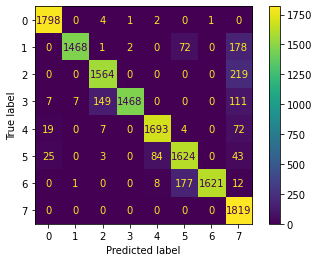

In [72]:
plot_confusion_matrix(model_rf_fin,X_test,y_test)

In [73]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.9152411665731912

# FINAL :1ST method(7:3): BOW+TFIDF+SMOTE+SVM

In [74]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_clf=make_pipeline(LinearSVC())
text_clf.fit(X_train,y_train)
predictions = text_clf.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1806    0    0    0    0    0    0    0]
 [   0 1721    0    0    0    0    0    0]
 [   0    0 1783    0    0    0    0    0]
 [   0    0    0 1742    0    0    0    0]
 [   0    0    0    0 1795    0    0    0]
 [   0    0    0    0    0 1779    0    0]
 [   0    1    0    1    0    0 1817    0]
 [   0    0    0    0    0    0    0 1819]]


In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00      1721
           2       1.00      1.00      1.00      1783
           3       1.00      1.00      1.00      1742
           4       1.00      1.00      1.00      1795
           5       1.00      1.00      1.00      1779
           6       1.00      1.00      1.00      1819
           7       1.00      1.00      1.00      1819

    accuracy                           1.00     14264
   macro avg       1.00      1.00      1.00     14264
weighted avg       1.00      1.00      1.00     14264



C:\Users\TMHBXB78\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


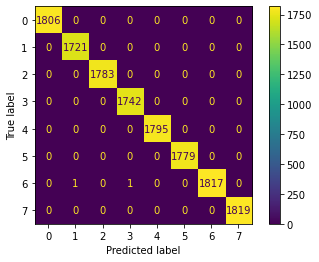

In [77]:
plot_confusion_matrix(text_clf,X_test,y_test)

# FINAL :1ST method(7:3): BOW+TFIDF+SMOTE+XGBOOST

In [78]:
from numpy import loadtxt
from xgboost import XGBClassifier

text_clf=make_pipeline(XGBClassifier())
text_clf.fit(X_train,y_train)
predictions = text_clf.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1805    0    0    0    0    0    1    0]
 [   0 1719    0    0    0    0    1    1]
 [   0    0 1783    0    0    0    0    0]
 [   0    0    0 1742    0    0    0    0]
 [   0    0    0    0 1795    0    0    0]
 [   0    0    0    0    1 1778    0    0]
 [   0    0    0    0    0    0 1819    0]
 [   0    0    0    0    0    0    0 1819]]


In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00      1721
           2       1.00      1.00      1.00      1783
           3       1.00      1.00      1.00      1742
           4       1.00      1.00      1.00      1795
           5       1.00      1.00      1.00      1779
           6       1.00      1.00      1.00      1819
           7       1.00      1.00      1.00      1819

    accuracy                           1.00     14264
   macro avg       1.00      1.00      1.00     14264
weighted avg       1.00      1.00      1.00     14264



C:\Users\TMHBXB78\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


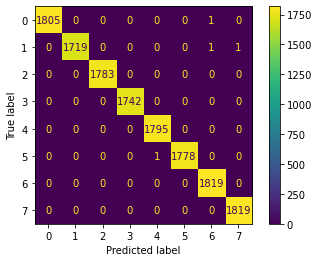

In [81]:
plot_confusion_matrix(text_clf,X_test,y_test)

# 2ND method(7:3): BOW+TFIDF+SMOTE+RANDOM FOREST+HYPERPARAMETER OPTIMIZATION USING RANDOMIZED SEARCH CROSS VALIDATION

Class=5, n=5403 (12.500%)
Class=6, n=5403 (12.500%)
Class=3, n=5403 (12.500%)
Class=4, n=5403 (12.500%)
Class=1, n=5403 (12.500%)
Class=2, n=5403 (12.500%)
Class=7, n=5403 (12.500%)
Class=0, n=5403 (12.500%)


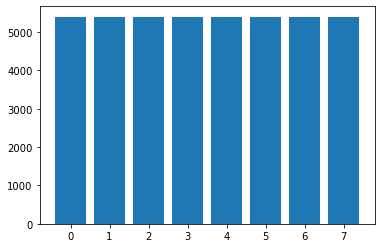

In [82]:
oversample = SMOTE()
X_tfidf, y_new = oversample.fit_resample(X_tfidf, y_new)
counterx = Counter(y_new)
for k,v in counterx.items():
    per = v / len(y_new) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counterx.keys(), counterx.values())
pyplot.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
#divide the data 7:3
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_new,test_size=0.33,random_state=42)

In [84]:
#number of trees that will be used as hyperparamter with a list starting from 10 to 220 at a interval of 50
n_estimators_list=list(range(10,220,50))
#best fit calculation for decision tree with two possible values 
criterion_list=['gini','entropy']
max_depth_list=list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list=[x/1000 for x in list (range (5,41,10))]
min_samples_leaf_list=[x/1000 for x in list (range (5,41,10))]
max_features_list=['sqrt','log2']

params_grid= {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list        
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *=len(params_grid[k])
    
print('Number of combinations =', num_combinations)
params_grid

Number of combinations = 1600


{'n_estimators': [10, 60, 110, 160, 210],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'max_features': ['sqrt', 'log2']}

In [85]:
def my_roc_auc_score(model, X_train, y_train): return metrics.roc_auc_score(y_test, model.predict(X_test))

model_rf= RandomizedSearchCV(estimator=RandomForestClassifier (class_weight='balanced'),
                             param_distributions=params_grid,
                             n_iter=50,
                             cv=10,
                             return_train_score=True)
model_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.015,
                                                             0.025, 0.035],
                                        'min_samples_split': [0.005, 0.015,
                                                              0.025, 0.035],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True)

In [86]:
model_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 0.015,
 'min_samples_leaf': 0.005,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'gini'}

In [87]:
#creating final model for random forest
model_rf_fin=RandomForestClassifier(
                                   criterion='gini',
                                   max_features='sqrt',
                                   min_samples_leaf=0.005,
                                   min_samples_split=0.015,
                                   n_estimators=210,
                                   max_depth=5,
                                   random_state=42)
model_rf_fin.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=0.005,
                       min_samples_split=0.015, n_estimators=210,
                       random_state=42)

In [88]:
predictions = model_rf_fin.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1794    4    4    0    3    0    1    0]
 [   1 1467    1    0    2   72    0  178]
 [   0    0 1470    0    0    0    0  313]
 [  17    0  278 1251    0    5    0  191]
 [  44    0   12    0 1417    3    0  319]
 [  32    0    3    0   84 1530    0  130]
 [   1    0    0    0    7  157 1621   33]
 [   0    0    0    0    0    0    0 1819]]


In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1806
           1       1.00      0.85      0.92      1721
           2       0.83      0.82      0.83      1783
           3       1.00      0.72      0.84      1742
           4       0.94      0.79      0.86      1795
           5       0.87      0.86      0.86      1779
           6       1.00      0.89      0.94      1819
           7       0.61      1.00      0.76      1819

    accuracy                           0.87     14264
   macro avg       0.90      0.87      0.87     14264
weighted avg       0.90      0.87      0.87     14264



C:\Users\TMHBXB78\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


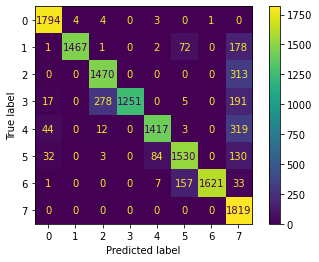

In [91]:
plot_confusion_matrix(model_rf_fin,X_test,y_test)

In [92]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.8671480650588895

# 5 FOLD STRATIFIED CROSS VALIDATION RANDOM FOREST+SMOTE+(BOW+TFIDF)

In [93]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn import ensemble

from sklearn.ensemble import RandomForestClassifier

# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_tfidf, y_new):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X_tfidf, y_new, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 34579, Test set:8645
Fold:2, Train set: 34579, Test set:8645
Fold:3, Train set: 34579, Test set:8645
Fold:4, Train set: 34579, Test set:8645
Fold:5, Train set: 34580, Test set:8644
Scores for each fold are: [0.9995373  0.99872759 0.99942163 0.99907461 0.99976863]
Average score: 1.00


In [94]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [95]:
def classification_report_with_accuracy_score(y_new, Z):
    print (classification_report(y_new, Z)) # print classification report
    return accuracy_score(y_new, Z) # return accuracy score

In [96]:
# Nested CV with parameter optimization
nested_score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X_tfidf, y_new, cv= kf, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1080
           4       1.00      1.00      1.00      1081
           5       1.00      1.00      1.00      1081
           6       1.00      1.00      1.00      1081
           7       1.00      1.00      1.00      1081

    accuracy                           1.00      8645
   macro avg       1.00      1.00      1.00      8645
weighted avg       1.00      1.00      1.00      8645

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1081
           5       1.00 

# 5 FOLD STRATIFIED CROSS VALIDATION SVM+SMOTE+(BOW+TFIDF)

In [97]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn import ensemble

from sklearn.ensemble import RandomForestClassifier

# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_tfidf, y_new):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_clf=make_pipeline(LinearSVC())


score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 34579, Test set:8645
Fold:2, Train set: 34579, Test set:8645
Fold:3, Train set: 34579, Test set:8645
Fold:4, Train set: 34579, Test set:8645
Fold:5, Train set: 34580, Test set:8644
Scores for each fold are: [0.99976865 0.99976865 0.99988433 1.         1.        ]
Average score: 1.00


In [98]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [99]:
def classification_report_with_accuracy_score(y_new, Z):
    print (classification_report(y_new, Z)) # print classification report
    return accuracy_score(y_new, Z) # return accuracy score

In [100]:
# Nested CV with parameter optimization
nested_score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1080
           4       1.00      1.00      1.00      1081
           5       1.00      1.00      1.00      1081
           6       1.00      1.00      1.00      1081
           7       1.00      1.00      1.00      1081

    accuracy                           1.00      8645
   macro avg       1.00      1.00      1.00      8645
weighted avg       1.00      1.00      1.00      8645

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1081
           5       1.00 

# 5 FOLD STRATIFIED CROSS VALIDATION XGBOOST+SMOTE+(BOW+TFIDF)

In [101]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn import ensemble

from sklearn.ensemble import RandomForestClassifier

# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_tfidf, y_new):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function
from numpy import loadtxt
from xgboost import XGBClassifier

text_clf=make_pipeline(XGBClassifier())


score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 34579, Test set:8645
Fold:2, Train set: 34579, Test set:8645
Fold:3, Train set: 34579, Test set:8645
Fold:4, Train set: 34579, Test set:8645
Fold:5, Train set: 34580, Test set:8644
Scores for each fold are: [0.99965298 0.9995373  0.99965298 1.         0.99988431]
Average score: 1.00


In [102]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [103]:
def classification_report_with_accuracy_score(y_new, Z):
    print (classification_report(y_new, Z)) # print classification report
    return accuracy_score(y_new, Z) # return accuracy score

In [104]:
# Nested CV with parameter optimization
nested_score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1080
           4       1.00      1.00      1.00      1081
           5       1.00      1.00      1.00      1081
           6       1.00      1.00      1.00      1081
           7       1.00      1.00      1.00      1081

    accuracy                           1.00      8645
   macro avg       1.00      1.00      1.00      8645
weighted avg       1.00      1.00      1.00      8645

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1081
           5       1.00 

# TFIDF+SMOTE+ENN+7:3 SPLIT

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pyodbc 
import nltk
import re

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=HHVDBCORT01;'
                      'Database=NASIR;'
                      'user =HHVDBCORT01\\TMHBXB78;'
                      'Trusted_Connection=yes;')

sql_query = pd.read_sql_query('SElect * from NASIR.DBO.POINT_ESTIMATES_NLP_PROSPECTIVE WHERE EF_OUTCOMES<>8', conn)
df = pd.DataFrame(sql_query, columns=['Findings_Value','EF_OUTCOMES'])
print(df)

                         Findings_Value EF_OUTCOMES
0             LV ejection fraction= 52%           5
1                 Estimated EF is >70%.           6
2                 Estimated EF is >70%.           6
3     Biplane LV ejection fraction= 35%           3
4                 Estimated EF is >70%.           6
...                                 ...         ...
7438              Estimated EF is >70%.           6
7439              Estimated EF is >70%.           6
7440  Biplane LV ejection fraction= 27%           2
7441              Estimated EF is >70%.           6
7442      LV EF by single plane is 57%.           5

[7443 rows x 2 columns]


In [106]:
##removal of extra spaces from the text
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+',' ', str(x)))
##removal of non-words characters with space
##df['FINDINGS_VALUE'] =  df['FINDINGS_VALUE'].apply(lambda x: re.sub(r'\W',' ', str(x)))
##ANY ONE digit/non-digit character
##df['FINDINGS_VALUE'] =  df['FINDINGS_VALUE'].apply(lambda x: re.sub(r'\d',' ', str(x)))
##removal of single characters within sentence
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+[a-z]\s+',' ', str(x)))
##removal of single characters beginning of sentence or at the end
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'^[a-z]\s+',' ', str(x)))

In [107]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
stop_words = set(stopwords.words('english'))  

def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)  
    clean_tokens = [w for w in word_tokens if not w in stop_words]  
    
    return clean_tokens
    
df['Findings_Value'] = df['Findings_Value'].apply(remove_stopwords)

In [108]:
# removal of numbers from text
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\[[0-9]*\]',' ', str(x)))
##removal of extra spaces from the text
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+',' ', str(x)))
##removal of non words characters with space
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\W',' ', str(x)))
##
df['Findings_Value'] =  df['Findings_Value'].apply(lambda x: re.sub(r'\s+',' ', str(x)))

In [109]:
X=df['Findings_Value']

In [110]:
y=df['EF_OUTCOMES']

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [112]:
count_vect = CountVectorizer(min_df=1,max_df=1.0)

In [113]:
X_counts = count_vect.fit_transform(X)

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
tfidf_transformer = TfidfTransformer()

In [116]:
X_tfidf=tfidf_transformer.fit_transform(X_counts)

In [117]:
from sklearn.preprocessing import LabelEncoder
y_new= LabelEncoder().fit_transform(y)

# SMOTE+ENN

In [118]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

Class=0, n=5403 (12.503%)
Class=1, n=5403 (12.503%)
Class=2, n=5403 (12.503%)
Class=3, n=5403 (12.503%)
Class=4, n=5403 (12.503%)
Class=5, n=5403 (12.503%)
Class=6, n=5394 (12.482%)
Class=7, n=5403 (12.503%)


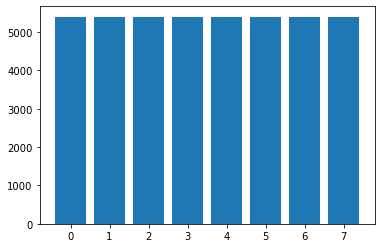

In [119]:
oversample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
X_tfidf, y_new = oversample.fit_resample(X_tfidf, y_new)
counterx = Counter(y_new)
for k,v in counterx.items():
    per = v / len(y_new) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counterx.keys(), counterx.values())
pyplot.show()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_new, test_size=0.33, random_state=42)

# TFIDF+SMOTE+ENN+7:3 SPLIT+RANDOM FOREST

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf= RandomForestClassifier()
text_clf=make_pipeline(rf)
# Train the model on training data
text_clf.fit(X_train,y_train)
# Use the forest's predict method on the test data
predictions = text_clf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [123]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1816    0    0    0    0    0    0    0]
 [   0 1803    0    0    0    1    0    3]
 [   0    0 1777    0    0    0    0    0]
 [   0    0    0 1743    2    0    0    0]
 [   0    0    3    1 1775    0    0    0]
 [   0    0    0    2    1 1782    0    0]
 [   0    0    0    0    0    0 1761    0]
 [   0    0    0    0    0    0    0 1791]]


In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1816
           1       1.00      1.00      1.00      1807
           2       1.00      1.00      1.00      1777
           3       1.00      1.00      1.00      1745
           4       1.00      1.00      1.00      1779
           5       1.00      1.00      1.00      1785
           6       1.00      1.00      1.00      1761
           7       1.00      1.00      1.00      1791

    accuracy                           1.00     14261
   macro avg       1.00      1.00      1.00     14261
weighted avg       1.00      1.00      1.00     14261



C:\Users\TMHBXB78\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


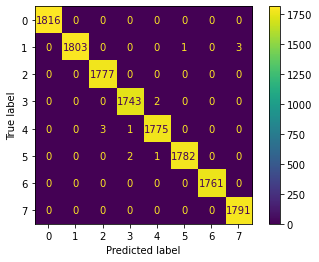

In [125]:
plot_confusion_matrix(text_clf,X_test,y_test)

# TFIDF+SMOTE+ENN+7:3 SPLIT+SUPPORT VECTOR MACHINES 

In [126]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_clf=make_pipeline(LinearSVC())
text_clf.fit(X_train,y_train)
predictions = text_clf.predict(X_test)

In [127]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1816    0    0    0    0    0    0    0]
 [   0 1807    0    0    0    0    0    0]
 [   0    0 1777    0    0    0    0    0]
 [   0    0    0 1745    0    0    0    0]
 [   0    0    0    0 1779    0    0    0]
 [   0    0    0    0    0 1785    0    0]
 [   0    0    0    0    0    0 1761    0]
 [   0    0    0    0    0    0    0 1791]]


C:\Users\TMHBXB78\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


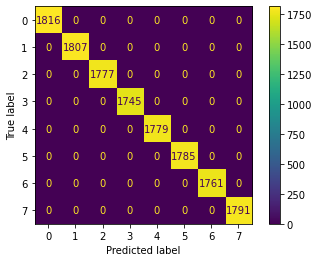

In [128]:
plot_confusion_matrix(text_clf,X_test,y_test)

In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1816
           1       1.00      1.00      1.00      1807
           2       1.00      1.00      1.00      1777
           3       1.00      1.00      1.00      1745
           4       1.00      1.00      1.00      1779
           5       1.00      1.00      1.00      1785
           6       1.00      1.00      1.00      1761
           7       1.00      1.00      1.00      1791

    accuracy                           1.00     14261
   macro avg       1.00      1.00      1.00     14261
weighted avg       1.00      1.00      1.00     14261



# TFIDF+SMOTE+ENN+7:3 SPLIT+XGBOOST

In [130]:
from numpy import loadtxt
from xgboost import XGBClassifier

text_clf=make_pipeline(XGBClassifier())
text_clf.fit(X_train,y_train)
predictions = text_clf.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1816    0    0    0    0    0    0    0]
 [   0 1805    0    1    0    0    0    1]
 [   0    0 1776    0    0    0    0    1]
 [   0    0    0 1745    0    0    0    0]
 [   0    0    0    0 1779    0    0    0]
 [   0    0    0    0    0 1785    0    0]
 [   0    0    0    0    0    0 1761    0]
 [   0    0    0    0    0    0    0 1791]]


C:\Users\TMHBXB78\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


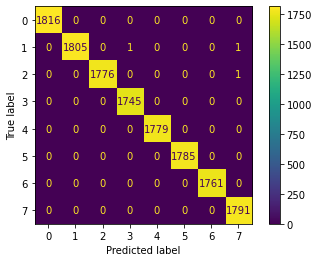

In [132]:
plot_confusion_matrix(text_clf,X_test,y_test)

In [133]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1816
           1       1.00      1.00      1.00      1807
           2       1.00      1.00      1.00      1777
           3       1.00      1.00      1.00      1745
           4       1.00      1.00      1.00      1779
           5       1.00      1.00      1.00      1785
           6       1.00      1.00      1.00      1761
           7       1.00      1.00      1.00      1791

    accuracy                           1.00     14261
   macro avg       1.00      1.00      1.00     14261
weighted avg       1.00      1.00      1.00     14261



# TFIDF+SMOTE+ENN+5FOLD STRATIFIED CROSS VALIDATION +RANDOM FOREST

In [134]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn import ensemble

from sklearn.ensemble import RandomForestClassifier

# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_tfidf, y_new):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X_tfidf, y_new, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 34572, Test set:8643
Fold:2, Train set: 34572, Test set:8643
Fold:3, Train set: 34572, Test set:8643
Fold:4, Train set: 34572, Test set:8643
Fold:5, Train set: 34572, Test set:8643
Scores for each fold are: [0.9995372  0.9994215  0.99895869 0.9990744  0.9995372 ]
Average score: 1.00


In [135]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [136]:
def classification_report_with_accuracy_score(y_new, Z):
    print (classification_report(y_new, Z)) # print classification report
    return accuracy_score(y_new, Z) # return accuracy score

In [137]:
# Nested CV with parameter optimization
nested_score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

#as we see the performance are good here so we are not requring any hyperparamter optimization in random forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1081
           2       1.00      1.00      1.00      1080
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1081
           6       1.00      1.00      1.00      1079
           7       1.00      1.00      1.00      1080

    accuracy                           1.00      8643
   macro avg       1.00      1.00      1.00      8643
weighted avg       1.00      1.00      1.00      8643

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1080
           5       1.00 

# TFIDF+SMOTE+ENN+5FOLD STRATIFIED CROSS VALIDATION + SVM

In [138]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn import ensemble

from sklearn.svm import LinearSVC

# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_tfidf, y_new):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function
from sklearn.pipeline import Pipeline

text_clf=make_pipeline(LinearSVC())


score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 34572, Test set:8643
Fold:2, Train set: 34572, Test set:8643
Fold:3, Train set: 34572, Test set:8643
Fold:4, Train set: 34572, Test set:8643
Fold:5, Train set: 34572, Test set:8643
Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [139]:
def classification_report_with_accuracy_score(y_new, Z):
    print (classification_report(y_new, Z)) # print classification report
    return accuracy_score(y_new, Z) # return accuracy score

In [140]:
# Nested CV with parameter optimization
nested_score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1081
           2       1.00      1.00      1.00      1080
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1081
           6       1.00      1.00      1.00      1079
           7       1.00      1.00      1.00      1080

    accuracy                           1.00      8643
   macro avg       1.00      1.00      1.00      8643
weighted avg       1.00      1.00      1.00      8643

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1080
           5       1.00 

In [141]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn import ensemble


# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_tfidf, y_new):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function
from numpy import loadtxt
from xgboost import XGBClassifier

text_clf=make_pipeline(XGBClassifier())


score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 34572, Test set:8643
Fold:2, Train set: 34572, Test set:8643
Fold:3, Train set: 34572, Test set:8643
Fold:4, Train set: 34572, Test set:8643
Fold:5, Train set: 34572, Test set:8643
Scores for each fold are: [0.9998843 0.9997686 0.9998843 0.9997686 0.9998843]
Average score: 1.00


In [142]:
def classification_report_with_accuracy_score(y_new, Z):
    print (classification_report(y_new, Z)) # print classification report
    return accuracy_score(y_new, Z) # return accuracy score

In [143]:
# Nested CV with parameter optimization
nested_score = cross_val_score(text_clf, X_tfidf, y_new, cv= kf, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1081
           2       1.00      1.00      1.00      1080
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1081
           6       1.00      1.00      1.00      1079
           7       1.00      1.00      1.00      1080

    accuracy                           1.00      8643
   macro avg       1.00      1.00      1.00      8643
weighted avg       1.00      1.00      1.00      8643

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1080
           2       1.00      1.00      1.00      1081
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00      1080
           5       1.00 